# Set-up

Import necessary libraries

In [48]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import uniform, randint
import matplotlib.ticker as mtick

Upload dataset (insurance.csv)

In [49]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/ForestTrees/data/insurance.csv'
df = pd.read_csv(file_path)
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


data checks

In [50]:
print(df.shape[0]) # no. of rows

1338


In [51]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [52]:
print(df.dtypes) # data types expected

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [53]:
print(df.duplicated().sum) # no. of duplicated entries

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool>


In [54]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


# Inspecting dataset variables via EDA Plots

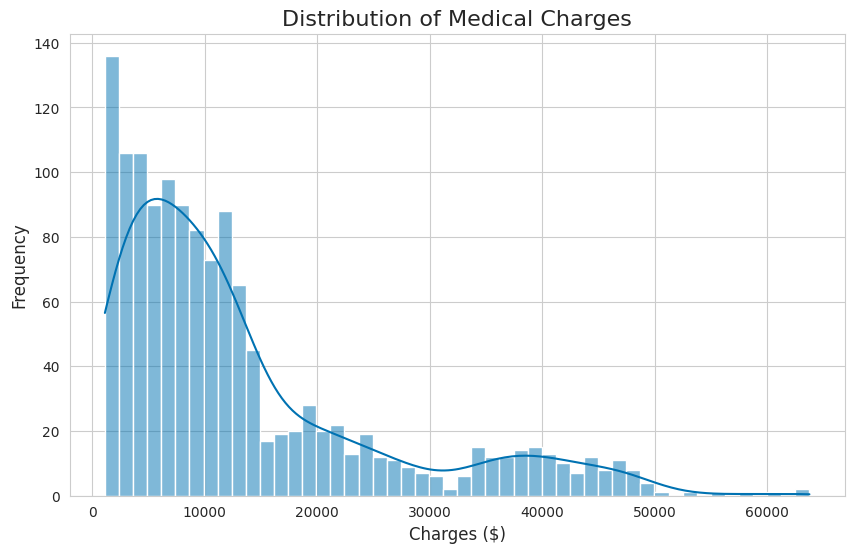

In [55]:
# Plot 1: Distribution of Charges (The Target)
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, bins=50, color="#0072B2")
plt.title('Distribution of Medical Charges', fontsize=16)
plt.xlabel('Charges ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

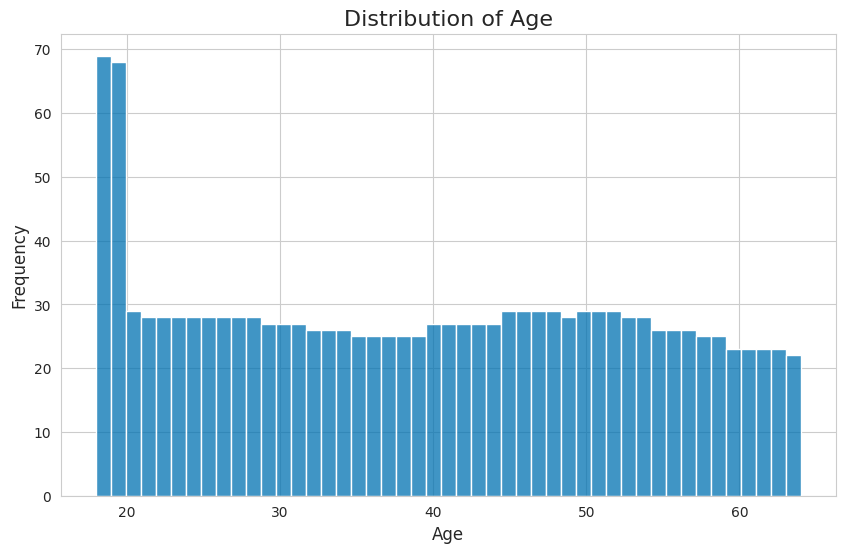

In [56]:
# Plot 2: Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=False, bins=df['age'].nunique(), color="#0072B2")
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

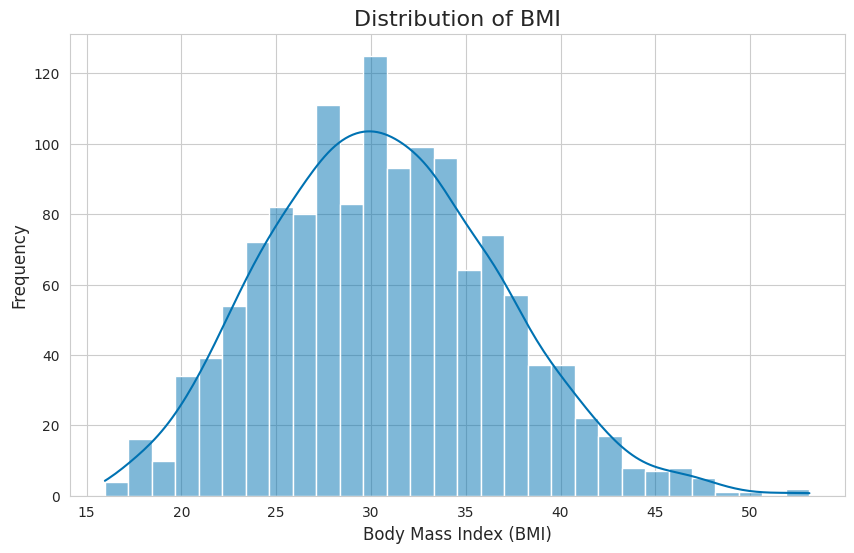

In [57]:
# Plot 3: Distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], kde=True, bins=30, color="#0072B2")
plt.title('Distribution of BMI', fontsize=16)
plt.xlabel('Body Mass Index (BMI)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

/tmp/ipython-input-4254434432.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=df, palette="colorblind")


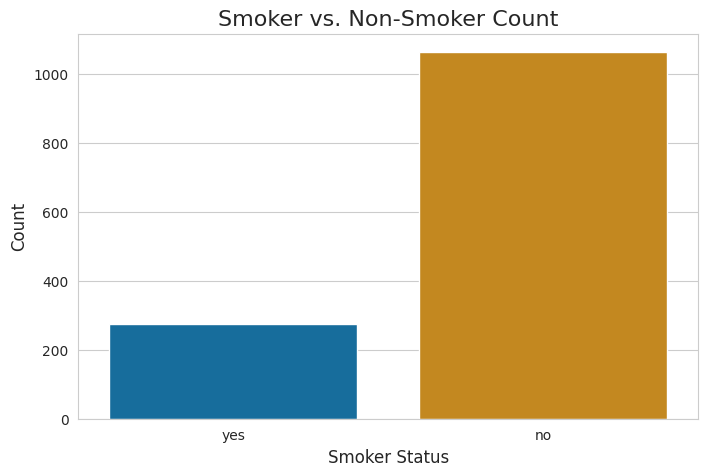

In [58]:
# Plot 4: Count of Smokers
plt.figure(figsize=(8, 5))
sns.countplot(x='smoker', data=df, palette="colorblind")
plt.title('Smoker vs. Non-Smoker Count', fontsize=16)
plt.xlabel('Smoker Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

/tmp/ipython-input-1094666120.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette="colorblind")


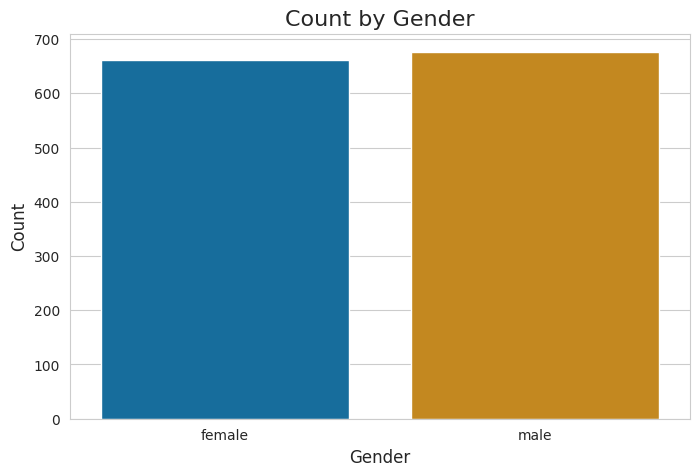

In [59]:
# Plot 5: Count by Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', data=df, palette="colorblind")
plt.title('Count by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

/tmp/ipython-input-4273515945.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=df, palette="colorblind")


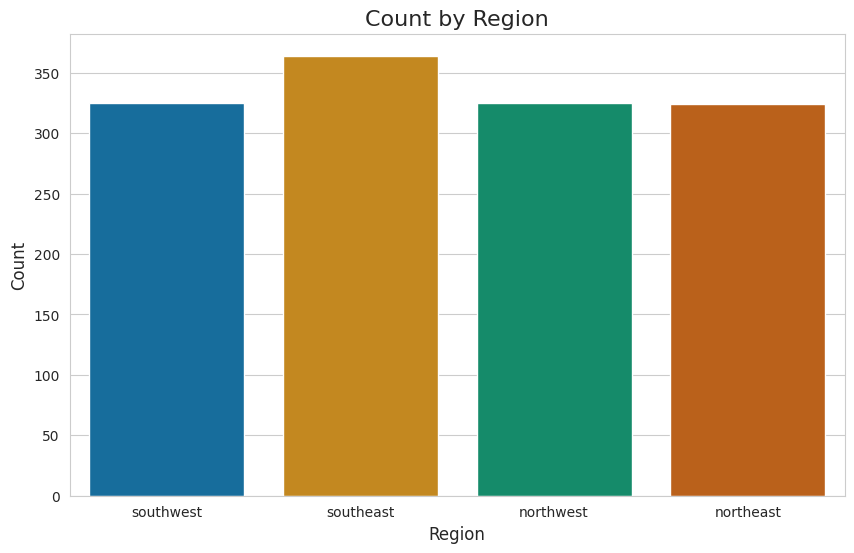

In [60]:
# Plot 6: Count by Region
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data=df, palette="colorblind")
plt.title('Count by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

/tmp/ipython-input-125900225.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='charges', data=df, palette="colorblind")


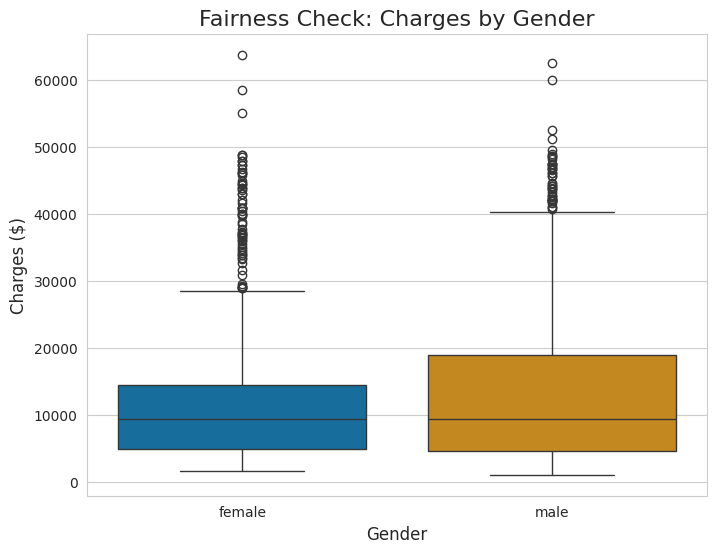

In [61]:
# Plot 7: Sex vs. Charges
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='charges', data=df, palette="colorblind")
plt.title('Fairness Check: Charges by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Charges ($)', fontsize=12)
plt.show()

/tmp/ipython-input-1882969904.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='charges', data=df, palette="colorblind")


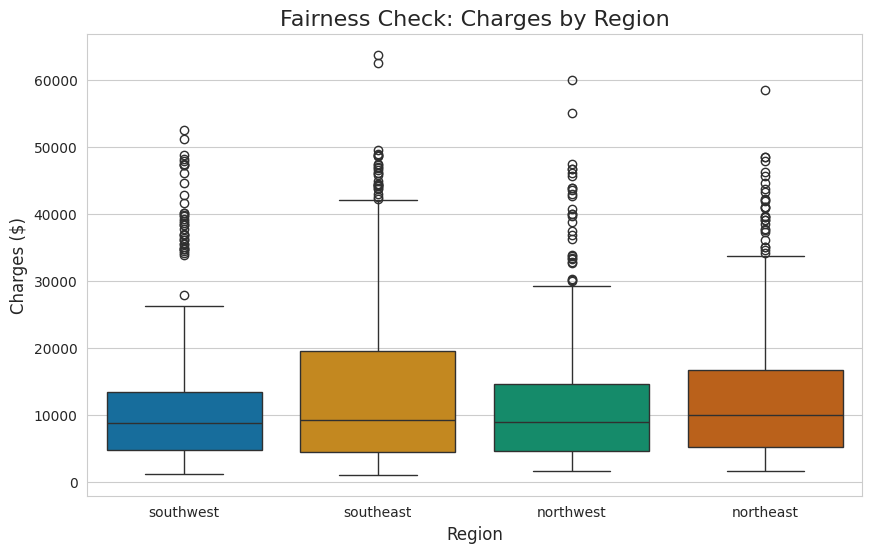

In [62]:
# Plot 8: Region vs. Charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=df, palette="colorblind")
plt.title('Fairness Check: Charges by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Charges ($)', fontsize=12)
plt.show()

/tmp/ipython-input-3960267218.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=df, palette="colorblind")


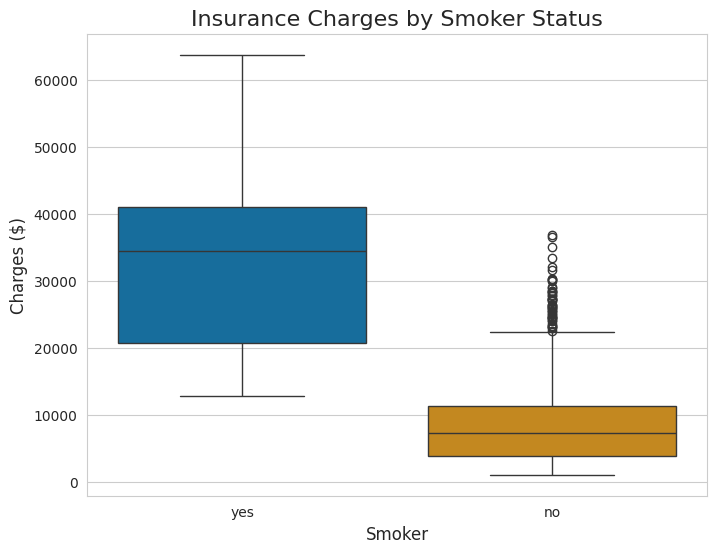

In [63]:
# Plot 9: Smoker vs. Charges
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df, palette="colorblind")
plt.title('Insurance Charges by Smoker Status', fontsize=16)
plt.xlabel('Smoker', fontsize=12)
plt.ylabel('Charges ($)', fontsize=12)
plt.show()

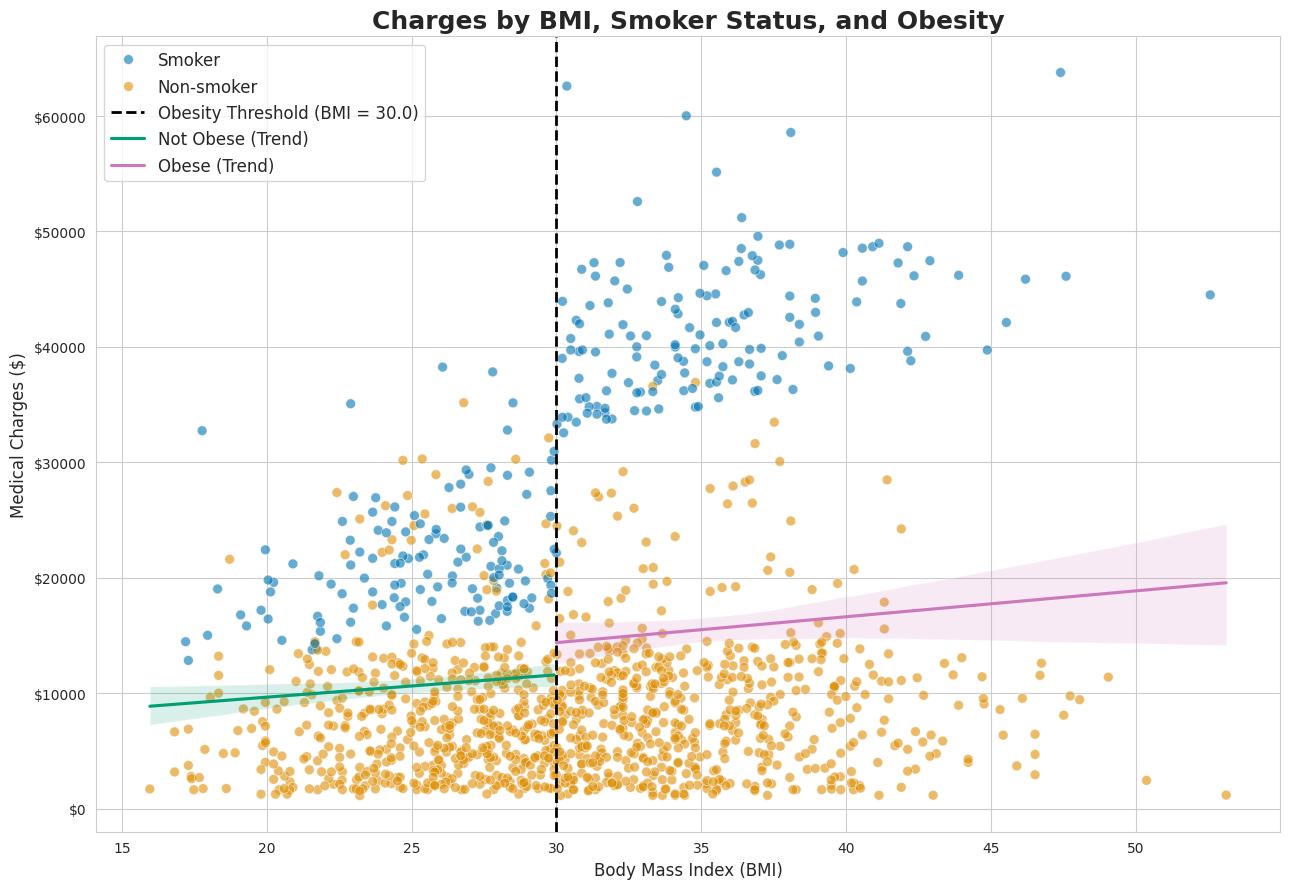

In [70]:
# Plot 10: Charges by BMI, Smoker Status, and Obesity
df1 = df.copy()
df1['is_obese'] = (df1['bmi'] >= 30).astype(int)

# Create two separate dataframes for the regression lines
df_obese = df1[df1['is_obese'] == 1]
df_not_obese = df1[df1['is_obese'] == 0]

BMI_OBESE_THRESHOLD = 30.0

# Load the colorblind palette
cb_palette = sns.color_palette("colorblind")

plt.figure(figsize=(13, 9))
ax = plt.gca()

# Plot the scatterplot, coloured by 'smoker'
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', palette='colorblind', alpha=0.6, s=50, ax=ax)

# Add the vertical threshold line
ax.axvline(x=BMI_OBESE_THRESHOLD, color='black', linestyle='--', linewidth=2, label=f'Obesity Threshold (BMI = {BMI_OBESE_THRESHOLD})')

# Add the regression line for the "Not Obese" group
sns.regplot(data=df_not_obese, x='bmi', y='charges', scatter=False, label='Not Obese (Trend)', color=cb_palette[2], ax=ax)

# Add the regression line for the "Obese" group
sns.regplot(data=df_obese, x='bmi', y='charges', scatter=False, label='Obese (Trend)', color=cb_palette[4], ax=ax)

ax.set_title('Charges by BMI, Smoker Status, and Obesity', fontsize=18, weight='bold')
ax.set_xlabel('Body Mass Index (BMI)', fontsize=12)
ax.set_ylabel('Medical Charges ($)', fontsize=12)
formatter = mtick.FormatStrFormatter('$%1.0f')
ax.yaxis.set_major_formatter(formatter)

handles, labels = ax.get_legend_handles_labels()
custom_labels = {'yes': 'Smoker', 'no': 'Non-smoker'}
new_labels = []
for label in labels:
    if label in custom_labels:
        new_labels.append(custom_labels[label])
    else:
        new_labels.append(label)

desired_order = ['Smoker', 'Non-smoker', 'Obesity Threshold (BMI = 30.0)', 'Not Obese (Trend)', 'Obese (Trend)']
new_handles = []
final_labels = []
label_to_handle = dict(zip(new_labels, handles))

for label in desired_order:
    if label in label_to_handle:
        new_handles.append(label_to_handle[label])
        final_labels.append(label)

ax.legend(handles=new_handles, labels=final_labels, loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()

Justification for `age_squared`:

From the graph below, it is shown that both lines are clearly curved, not straight, so we should use `age_squared` to represent this curve line. It also rejects the creation of a new feature of `smoker_x_age`, which is the interaction between is smoker and age, because the lines are almost parallel, so, adding it would be unecessary and wouldn't improve the model.

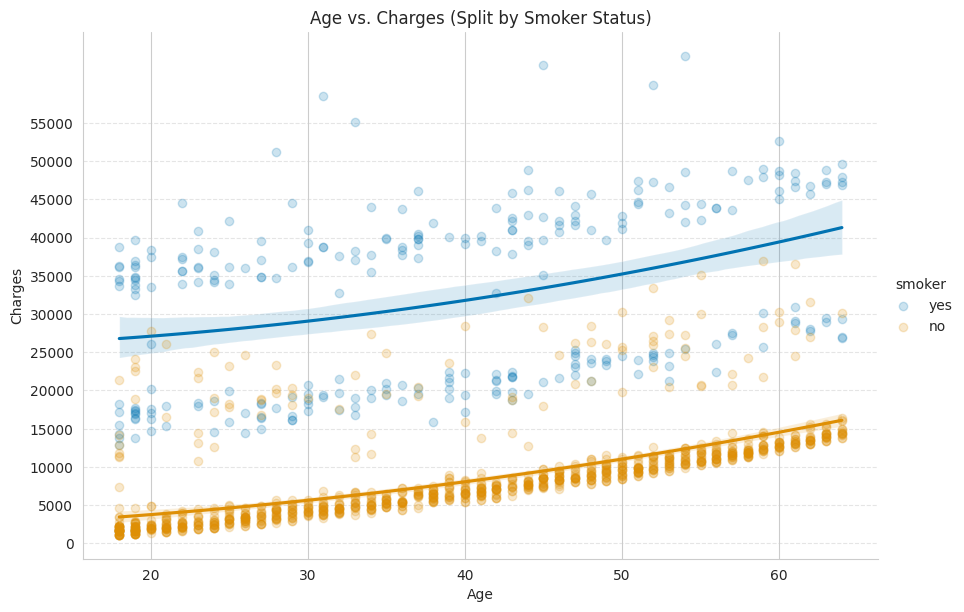

In [71]:
# Plot 11: Age vs. Charges (Split by Smoker Status)
sns.lmplot(data=df, x='age', y='charges', hue='smoker', order=2, aspect=1.5, height=6, scatter_kws={'alpha': 0.2}, palette = 'colorblind')

plt.title("Age vs. Charges (Split by Smoker Status)")
plt.xlabel("Age")
plt.ylabel("Charges ($)")
plt.yticks(label = range(0, 60000, 5000), ticks = range(0, 60000, 5000))
plt.grid(axis = "y", linestyle = "--", alpha = 0.5)
plt.show()

Justification for making `children` into categorical:

/tmp/ipython-input-1689516816.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


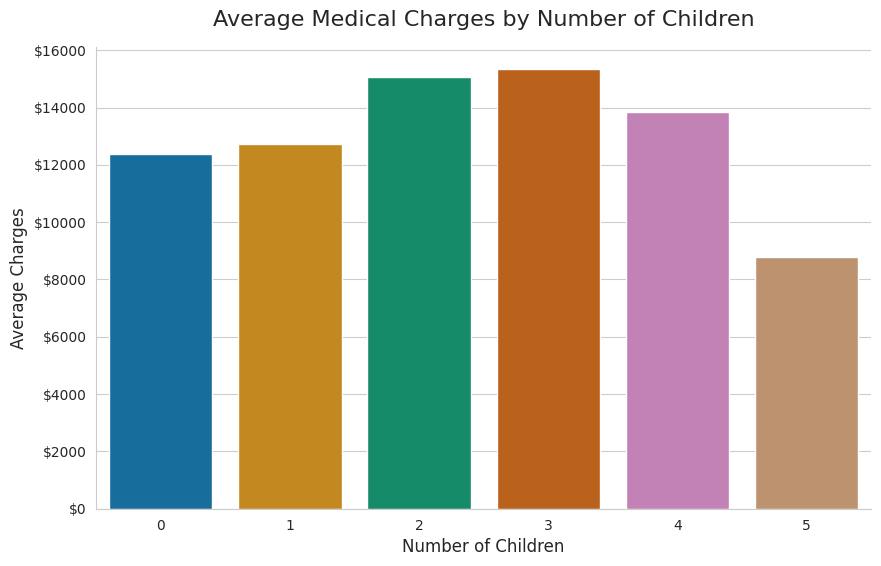

In [66]:
df_child = df.groupby("children")["charges"].mean().reset_index()

df_child['children'] = df_child['children'].astype(str)

plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=df_child,
    x="children",
    y="charges",
    palette="colorblind"
)

ax.set_title("Average Medical Charges by Number of Children", fontsize=16, pad=15)
ax.set_xlabel("Number of Children", fontsize=12)
ax.set_ylabel("Average Charges", fontsize=12)

formatter = mtick.FormatStrFormatter('$%1.0f')
ax.yaxis.set_major_formatter(formatter)

sns.despine()
plt.show()

from the two graphs below, we can see that for bmi bigger or equals to 30, there is a sudden leap in the charge for insurance, which aligns with the situation of customer having obesity. On the other hand, if we split the customers based on bmi equals to 27.5, the charges remain the same for a small range of values in x axis before having the sudden leap, which contradicts with the real world case that customers who have obesity will have significant higher cost than customers who don't have obesity. This shows that this dataset is based on the customers who are caucasian, as their definition of being obese is bmi = 30, which aligns with the result of the graph.

As the plots show, the relationship between BMI and charges is not one smooth curve (so not using bmi_squared like age). Instead, it's two parallel lines. The slope is similar for both groups, but the obese group has a large step-increase in cost. Therefore, the is_obese binary feature is the correct way to model this relationship.

In [67]:
# this is to proof our assumption that if a customer is a smoker and obese, the
# increase in the charges is not a simple addition, but will add more
df_obese_x_smoker = df.copy()
df_obese_x_smoker["is_obese"] = (df_obese_x_smoker["bmi"] >= 30).astype(int)
avg = df_obese_x_smoker.groupby(["is_obese", "smoker"])["charges"].mean().reset_index()
print(avg)

   is_obese smoker       charges
0         0     no   7977.029520
1         0    yes  21363.217016
2         1     no   8842.691548
3         1    yes  41557.989840


baseline cost: 8000

only smoking: + (21300-800) = + 13000

only obese: + 800

if it is a simple addition: is obese and is smoker will be 8000 + 13000 + 800 = 21800, which is not equal to 41000. So, it is shown that being both smoker and obese, the increase in the cost is not the same as only increase in the cost of is_obese + increase in the cost of is smoker. Instead, it will increase more.

In [68]:
df_sex_x_smoker = df.copy()
df_sex_x_smoker["is_male"] = (df_sex_x_smoker["sex"] == "male").astype(int)
avg = df_sex_x_smoker.groupby(["is_male", "smoker"])["charges"].mean().reset_index()
print(avg)

   is_male smoker       charges
0        0     no   8762.297300
1        0    yes  30678.996276
2        1     no   8087.204731
3        1    yes  33042.005975


this table shows that being male and being smoker at the same time is not a simple additive relationship:

baseline (female, non-smoker): 8762
cost of being male (non-smoker): -675
cost of being a smoker (female): + 21916

if no interaction, purely addition, being male smoker will be 8762 + (-675) + 21916 = 30003

but the actual average cost for a male smoker is 33042, 3039 more than purely addition (means that the "penalty" for smoking is 3039 higher for males than it is for females)

In [69]:
df_region_x_smoker = df.copy()
avg = df_region_x_smoker.groupby(["region", "smoker"])["charges"].mean().reset_index()
print(avg)

      region smoker       charges
0  northeast     no   9165.531672
1  northeast    yes  29673.536473
2  northwest     no   8556.463715
3  northwest    yes  30192.003182
4  southeast     no   8032.216309
5  southeast    yes  34844.996824
6  southwest     no   8019.284513
7  southwest    yes  32269.063494


this shows that there is a significant interaction effect between smoker and region.

If we set the baseline model as region = northeast and not a smoker, being a customer from southwest (non-smoker) will - 1146, while being a northeast smoker will + 20508. If it is just a simple addition, being someone from southwest + smoker will be roughly 28560, while the actual average is 32269.